# **Q1**


In [1]:
from pyspark.sql import SparkSession

appName = "Clothing Graph"
master = "local"

# Create a Spark session
spark = SparkSession.builder \
    .appName(appName) \
    .master(master) \
    .getOrCreate()

# Load the dataset
file_path = r"C:\Users\nickc\OneDrive\Documents\GitHub\hw3-nosql-databases-nick1117\shopping_trends.csv"  # Replace with your actual file path
data = spark.read.csv(file_path, header=True, inferSchema=True)

data.describe().show()

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: org.apache.spark.SparkException: Invalid Spark URL: spark://HeartbeatReceiver@Nicks_Laptop.mshome.net:62804
	at org.apache.spark.rpc.RpcEndpointAddress$.apply(RpcEndpointAddress.scala:66)
	at org.apache.spark.rpc.netty.NettyRpcEnv.asyncSetupEndpointRefByURI(NettyRpcEnv.scala:140)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.executor.Executor.<init>(Executor.scala:301)
	at org.apache.spark.scheduler.local.LocalEndpoint.<init>(LocalSchedulerBackend.scala:64)
	at org.apache.spark.scheduler.local.LocalSchedulerBackend.start(LocalSchedulerBackend.scala:132)
	at org.apache.spark.scheduler.TaskSchedulerImpl.start(TaskSchedulerImpl.scala:235)
	at org.apache.spark.SparkContext.<init>(SparkContext.scala:599)
	at org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
	at java.base/jdk.internal.reflect.DirectConstructorHandleAccessor.newInstance(DirectConstructorHandleAccessor.java:62)
	at java.base/java.lang.reflect.Constructor.newInstanceWithCaller(Constructor.java:502)
	at java.base/java.lang.reflect.Constructor.newInstance(Constructor.java:486)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:238)
	at py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
	at py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1570)


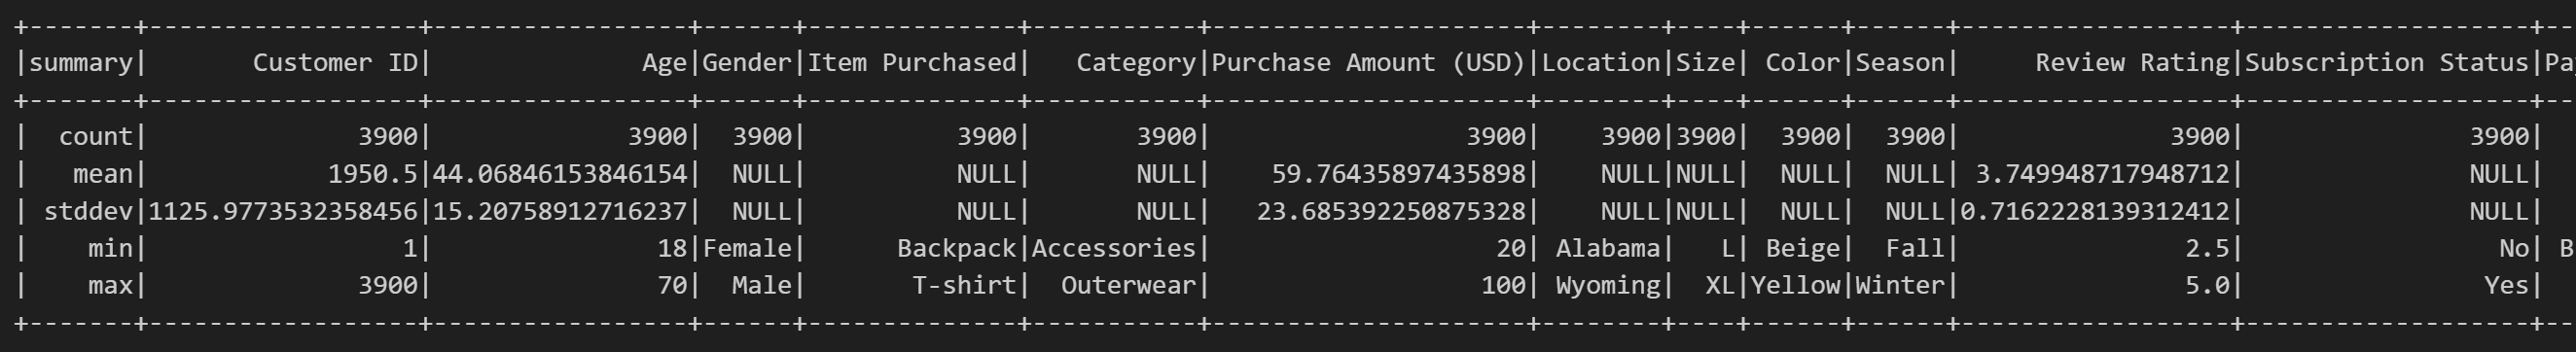

# **Q2**


In [15]:
from neo4j import GraphDatabase 
 
class Neo4JConnection: 
    def __init__(self, uri, user, password): 
        """Initialize the Neo4j connection with URI, username, and password.""" 
        self.driver = GraphDatabase.driver(uri, auth=(user, password)) 
 
    def close(self): 
        """Close the Neo4j connection.""" 
        if self.driver: 
            self.driver.close() 
 
    def execute_query(self, query, parameters=None): 
        """Execute a Cypher query and return the result.""" 
        with self.driver.session() as session: 
            result = session.run(query, parameters) 
            return result.data() 
        

NEO4J_URI="neo4j+s://35252cfb.databases.neo4j.io"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="Xgq7X4hCv0J5aBkC3-jt-TPSr3sQDQmrNrWkUetWPWY"
AURA_INSTANCEID="35252cfb"
AURA_INSTANCENAME="Instance01"

neo4j_conn = Neo4JConnection(NEO4J_URI, NEO4J_USERNAME, NEO4J_PASSWORD) 




In [16]:
def create_customer_item_graph(connection, row):
    query = """
    MERGE (customer:Customer {id: $customer_id, age: $age, gender: $gender})
    MERGE (item:Item {name: $item_name, category: $category})
    MERGE (customer)-[p:PURCHASED {location: $location, purchase_amount: $purchase_amount, size: $size, color: $color, season: $season, review_rating: $review_rating, 
                                    payment_method: $payment_method, shipping_type: $shipping_type, discount_applied: $discount_applied, promo_code_used: $promo_code_used, 
                                    previous_purchases: $previous_purchases, preferred_payment_method: $preferred_payment_method, 
                                    frequency_of_purchases: $frequency_of_purchases}]->(item)
    """
    
    parameters = {
        'customer_id': int(row['Customer ID']),
        'age': int(row['Age']),
        'gender': row['Gender'],
        'item_name': row['Item Purchased'],
        'category': row['Category'],
        'location': row['Location'],
        'purchase_amount': float(row['Purchase Amount (USD)']),
        'size': row['Size'],
        'color': row['Color'],
        'season': row['Season'],
        'review_rating': float(row['Review Rating']),
        'payment_method': row['Payment Method'],
        'shipping_type': row['Shipping Type'],
        'discount_applied': row['Discount Applied'],
        'promo_code_used': row['Promo Code Used'],
        'previous_purchases': int(row['Previous Purchases']),
        'preferred_payment_method': row['Preferred Payment Method'],
        'frequency_of_purchases': row['Frequency of Purchases']
    }
    
    connection.execute_query(query, parameters)
    print(f"Customer {row['Customer ID']} and their purchase added")

def load_spark_data_to_neo4j(connection, spark_df):
    pandas_df = spark_df.toPandas()
    for _, row in pandas_df.iterrows():
        create_customer_item_graph(connection, row)

def delete_all_nodes(connection):
    query = """
    MATCH (n)
    DETACH DELETE n;
    """
    connection.execute_query(query)
    print("All nodes deleted.")

try: 
    # Execute the queries 
    delete_all_nodes(neo4j_conn) 
    load_spark_data_to_neo4j(neo4j_conn, data)
finally: 
    # Close the connection when done 
    neo4j_conn.close()

All nodes deleted.
Customer 1 and their purchase of Blouse added.
Customer 2 and their purchase of Sweater added.
Customer 3 and their purchase of Jeans added.
Customer 4 and their purchase of Sandals added.
Customer 5 and their purchase of Blouse added.
Customer 6 and their purchase of Sneakers added.
Customer 7 and their purchase of Shirt added.
Customer 8 and their purchase of Shorts added.
Customer 9 and their purchase of Coat added.
Customer 10 and their purchase of Handbag added.
Customer 11 and their purchase of Shoes added.
Customer 12 and their purchase of Shorts added.
Customer 13 and their purchase of Coat added.
Customer 14 and their purchase of Dress added.
Customer 15 and their purchase of Coat added.
Customer 16 and their purchase of Skirt added.
Customer 17 and their purchase of Sunglasses added.
Customer 18 and their purchase of Dress added.
Customer 19 and their purchase of Sweater added.
Customer 20 and their purchase of Pants added.
Customer 21 and their purchase of

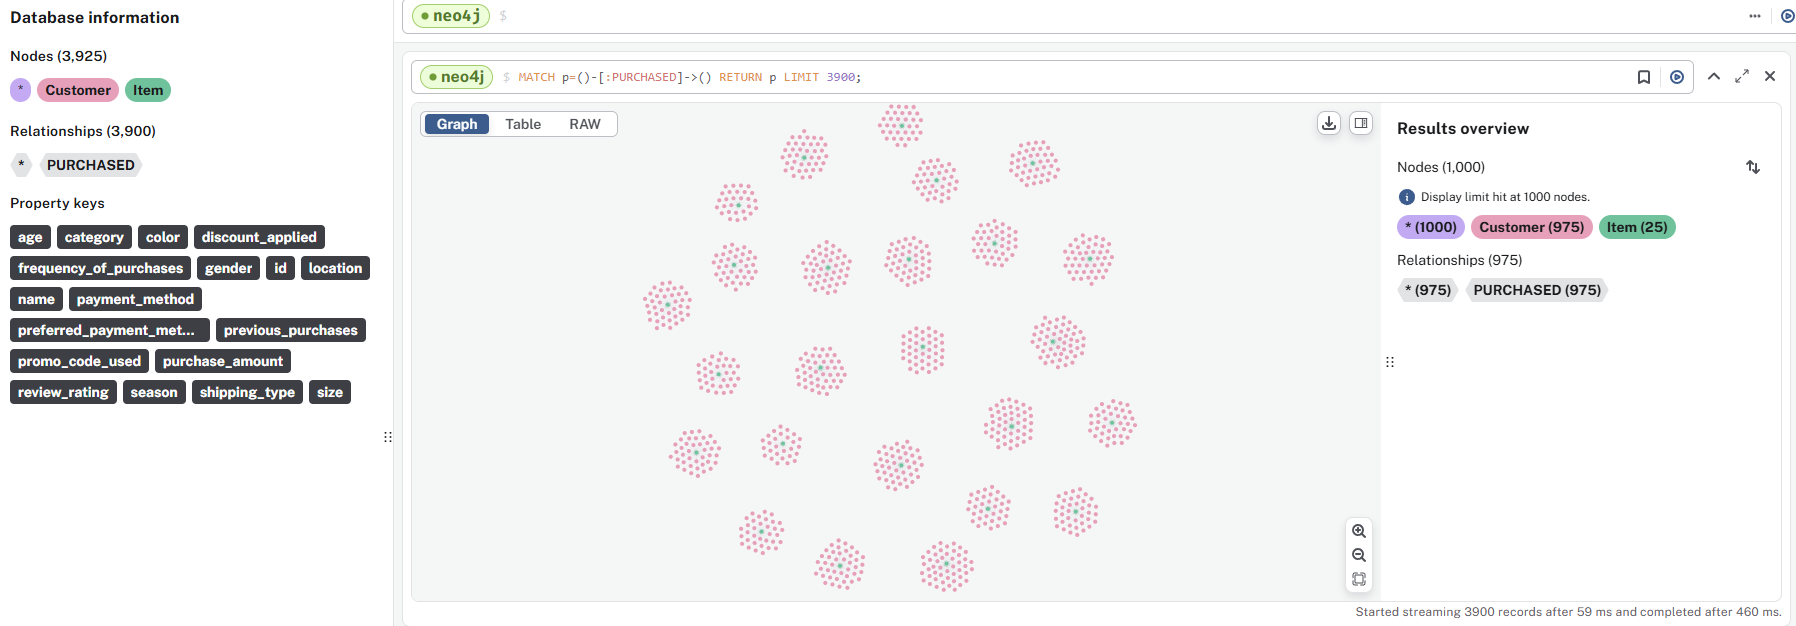
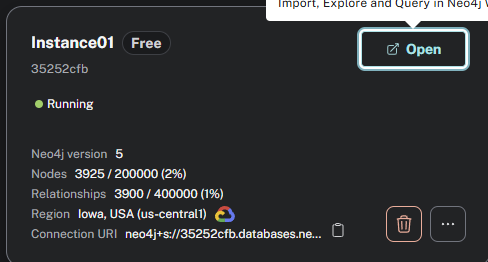

# **Q3**


In [18]:
#  # Function for returning people who mentored others 
# def get_mentors(connection): 
#     query = """ 
#     MATCH (n:Person) -[:MENTORED]-> (m:Person) 
#     RETURN n; 
#     """ 
#     result = connection.execute_query(query) 
#     for record in result: 
#         print(record) 

def percentage_users_50_plus(connection):
    total_users_query = """
    MATCH (u:Customer)
    RETURN count(u) AS total_users
    """
    users_50_plus_query = """
    MATCH (u:Customer)
    WHERE u.age >= 50
    RETURN count(u) AS users_50_plus
    """

    total_users_result = connection.execute_query(total_users_query) 
    users_50_plus_result = connection.execute_query(users_50_plus_query) 

    #need to get counts from results
    total_users = total_users_result[0]['total_users']
    users_50_plus = users_50_plus_result[0]['users_50_plus']
    
    percentage = (users_50_plus / total_users) * 100
    print(f"Percentage of users who are 50+ years old: {percentage:.2f}%")
    return percentage


try:
    percentage_users_50_plus(neo4j_conn)
finally:
    # Close the connection when done
    neo4j_conn.close()

C:\Users\nickc\AppData\Local\Temp\ipykernel_106596\643064221.py:15: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with self.driver.session() as session:


Percentage of users who are 50+ years old: 39.97%


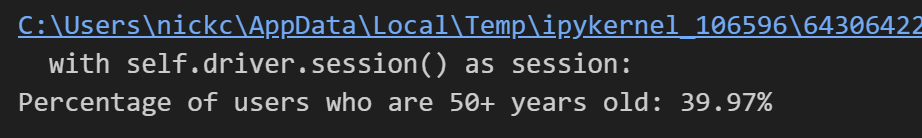

# **Q4**

In [19]:
#  # Function for returning people who mentored others 
# def get_mentors(connection): 
#     query = """ 
#     MATCH (n:Person) -[:MENTORED]-> (m:Person) 
#     RETURN n; 
#     """ 
#     result = connection.execute_query(query) 
#     for record in result: 
#         print(record) 

def most_purchased_item_hawaii(connection):
    query = """
    MATCH (u:Customer)-[p:PURCHASED]->(i:Item)
    WHERE p.location = 'Hawaii'
    RETURN i.name AS item, count(p) AS purchase_count
    ORDER BY purchase_count DESC
    LIMIT 1
    """

    result = connection.execute_query(query)

    most_purchased_item = result[0]['item']
    purchase_count = result[0]['purchase_count']
    print(f"The most purchased item in Hawaii is '{most_purchased_item}' with {purchase_count} purchases.")
    return result

try:
    most_purchased_item_hawaii(neo4j_conn)
finally:
    # Close the connection when done
    neo4j_conn.close()


C:\Users\nickc\AppData\Local\Temp\ipykernel_106596\643064221.py:15: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with self.driver.session() as session:


The most purchased item in Hawaii is 'Handbag' with 6 purchases.


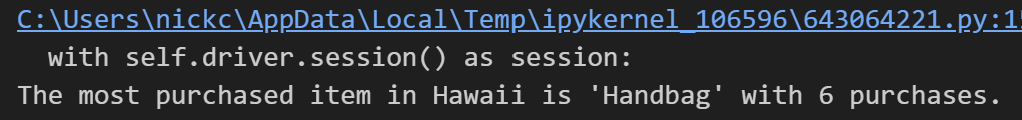

# **Q5**

In [25]:
def most_popular_season(connection):
    query = """
    MATCH (u:Customer)-[p:PURCHASED]->(i:Item)
    RETURN p.season AS season, count(p) AS purchase_count
    ORDER BY purchase_count DESC
    LIMIT 1
    """

    result = connection.execute_query(query)
    most_popular_season = result[0]['season']
    purchase_count = result[0]['purchase_count']
    print(f"The most popular season to shop is '{most_popular_season}' with {purchase_count} purchases.")
    return most_popular_season

def most_popular_shipping_method(connection, season):
    query = """
    MATCH (u:Customer)-[p:PURCHASED]->(i:Item)
    WHERE p.season = $season
    RETURN p.shipping_type AS shipping_method, count(p) AS shipping_count
    ORDER BY shipping_count DESC
    LIMIT 1
    """

    parameters = {'season': season}
    result = connection.execute_query(query, parameters)
    most_purchased_item = result[0]['shipping_method']
    purchase_count = result[0]['shipping_count']
    print(f"The most purchased item in Hawaii is '{most_purchased_item}' with {purchase_count} purchases.")
    return result

try:
    season = most_popular_season(neo4j_conn)
    most_popular_shipping_method(neo4j_conn, season)
finally:
    # Close the connection when done
    neo4j_conn.close()

C:\Users\nickc\AppData\Local\Temp\ipykernel_106596\643064221.py:15: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with self.driver.session() as session:


The most popular season to shop is 'Spring' with 999 purchases.
The most purchased item in Hawaii is '2-Day Shipping' with 178 purchases.


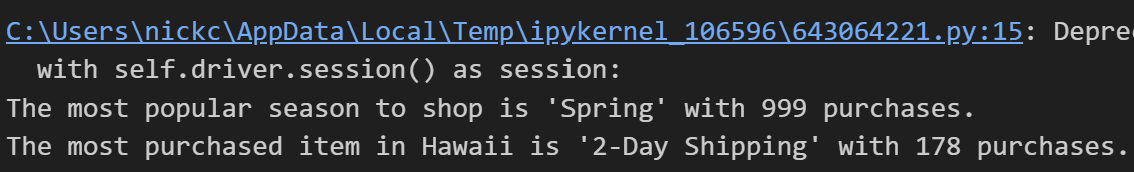

# **Q6**

In [27]:
def recommended_item_state(connection, state):
    query = """
    MATCH (u:Customer)-[p:PURCHASED]->(i:Item)
    WHERE p.location = $state
    RETURN i.name AS item, count(p) AS purchase_count
    ORDER BY purchase_count DESC
    LIMIT 3
    """

    parameters = {'state': state}
    result = connection.execute_query(query, parameters)
    print(f"Recommended items for shoppers in {state}:")
    for record in result:
        print(f"- {record['item']}: {record['purchase_count']} purchases")
    return result

state = 'Kentucky'
result = recommended_item_state(neo4j_conn, state)

C:\Users\nickc\AppData\Local\Temp\ipykernel_106596\643064221.py:15: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with self.driver.session() as session:


Recommended items for shoppers in Kentucky:
- Sweater: 7 purchases
- Handbag: 7 purchases
- Shirt: 6 purchases


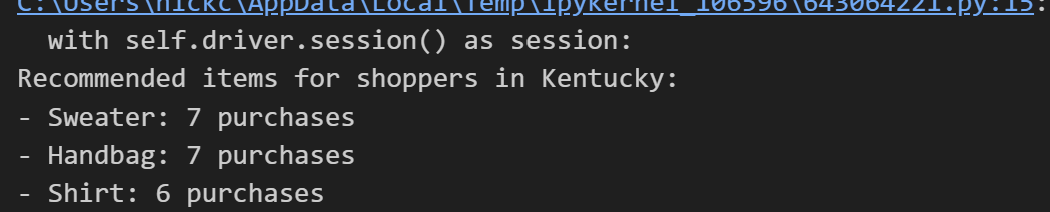